In [166]:
import os
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import torchvision

import helper_utils

In [167]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using device: CUDA")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: MPS (Apple Silicon GPU)")
else:
    device = torch.device("cpu")
    print(f"Using device: CPU")

Using device: CPU


In [168]:
# Set the path to store the dataset files
data_path = "./EMNIST_data"

In [169]:
# transform= transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1736),(0.3317))
# ])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.transpose(1, 2).flip(1)),  # fix orientation
    transforms.Normalize((0.1736),(0.3317))
])


In [170]:
train_data= torchvision.datasets.EMNIST(
    root=data_path,
    split='letters',
    train=True,
    download=True,
)

test_dataset = torchvision.datasets.EMNIST(
    root=data_path,  # Specify the root directory for the dataset
    split='letters',  # Use the 'letters' subset (26 lowercase classes)
    train=False,  # Indicate that this is the test set
    download=True  # Download the dataset if needed (based on the previous check)
)

<PIL.Image.Image image mode=L size=28x28 at 0x1AD001C0920>


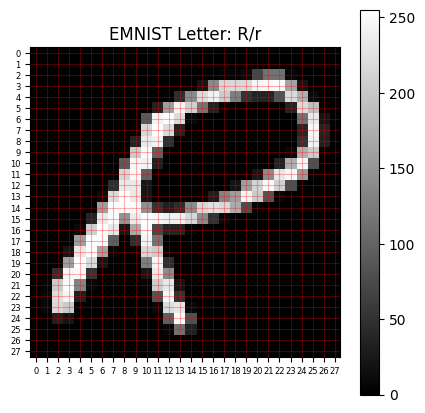

In [171]:
# Set the index of the sample image to view
index = 90000

# Retrieve the transformed image tensor and its label from the training set
img_tensor, label = train_data[index]

# Print the image tensor to see the raw values (after transformation)
print(img_tensor)
def correct_image_orientation(image):
    rotated = F.rotate(image, 90) # Rotate the image 90 degrees clockwise
    flipped = F.vflip(rotated) # Flip the image vertically
    return flipped

# Rotate the image and Reflect it
img_transformed = correct_image_orientation(img_tensor)

# Visualize the transformed image
helper_utils.visualize_image(img_transformed, label)

In [172]:
train_data= torchvision.datasets.EMNIST(
    root=data_path,
    split='letters',
    train=True,
    download=True,
    transform= transform
)

test_dataset = torchvision.datasets.EMNIST(
    root=data_path,  # Specify the root directory for the dataset
    split='letters',  # Use the 'letters' subset (26 lowercase classes)
    train=False,  # Indicate that this is the test set
    download=True, # Download the dataset if needed (based on the previous check)
    transform= transform
)

In [173]:
# Set the index of the sample image to view
index = 90000

# Retrieve the transformed image tensor and its label from the training set
img_tensor, label = train_data[index]

# Print the image tensor to see the raw values (after transformation)
print(img_tensor)

tensor([[[-0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234],
         [-0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234],
         [-0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.4406,  0.8126,
          -0.1450, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234, -0.5234],
         [-0.5234, -0.5234, -0.1450, -0.2869, -0.5234, -0.5234, -0.5234,
          -0.5234, -0.5234, -0.5234, -0.5234, -0

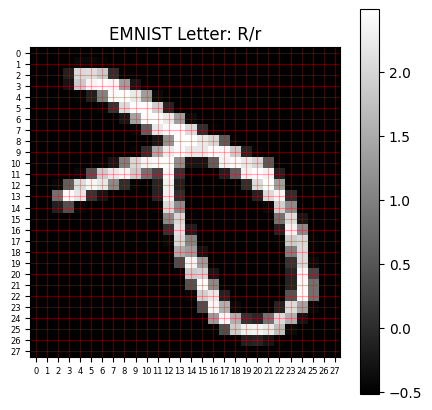

In [174]:
def correct_image_orientation(image):
    rotated = F.rotate(image, 90) # Rotate the image 90 degrees clockwise
    flipped = F.vflip(rotated) # Flip the image vertically
    return flipped

# Rotate the image and Reflect it
img_transformed = correct_image_orientation(img_tensor)

# Visualize the transformed image
helper_utils.visualize_image(img_transformed, label)

In [175]:
train_dataloaders= DataLoader(dataset=train_data,batch_size=64,shuffle=True)
test_dataloaders=DataLoader(dataset=test_dataset,batch_size=1000,shuffle=False)

In [176]:
print("--- Train Loader --- \n")
helper_utils.display_data_loader_contents(train_dataloaders)
print("\n--- Test Loader --- \n")
helper_utils.display_data_loader_contents(test_dataloaders)

--- Train Loader --- 

Total number of images in dataset: 124800
Total number of batches: 1950
--- Batch 1 ---
Data shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])

--- Test Loader --- 

Total number of images in dataset: 20800
Total number of batches: 21
--- Batch 1 ---
Data shape: torch.Size([1000, 1, 28, 28])
Labels shape: torch.Size([1000])


In [177]:
class SimpleLetterNN(nn.Module):
    def __init__(self):
        super(SimpleLetterNN,self).__init__()
        self.flatten=nn.Flatten()
        self.layers= nn.Sequential(
            nn.Linear(784,125),
            nn.ReLU(),
            nn.Linear(125,27)
        )
    def forward(self,x):
        x=self.flatten(x)
        x= self.layers(x)
        return x

# class SimpleLetterNN(nn.Module):
#     def __init__(self):
#         super(SimpleLetterNN, self).__init__()
        
#         self.flatten = nn.Flatten()

#         self.layers = nn.Sequential(
#             nn.Linear(784, 256),
#             nn.ReLU(),
#             nn.Linear(256, 128),
#             nn.ReLU(),
#             nn.Linear(128, 27)  # 26 letters A–Z
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         return self.layers(x)


In [178]:
model= SimpleLetterNN()
loss_function= nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(),lr=0.001)

In [179]:
def trainfunc(model,loss_function,optimizer,train_dataloaders,device):
    # Ensure the model is on the correct device for training
    model = model.to(device)
    # Set the model to training mode
    model.train()
    # Initialize trackers for the entire epoch's loss
    epoch_loss = 0.0
    
    # Initialize trackers for periodic progress reporting
    running_loss = 0.0
    num_correct_predictions = 0
    total_predictions = 0
    total_batches = len(train_dataloaders)
    for idex,(input,target) in enumerate(train_dataloaders):
 
        input, target= input.to(device) ,target.long().to(device)
        optimizer.zero_grad()
        output=model(input)
        loss=loss_function(output,target)
        loss.backward()
        optimizer.step()

        # Accumulate the loss for tracking and reporting
        loss_value = loss.item()
        epoch_loss += loss_value
        running_loss += loss_value
        
        # Calculate accuracy metrics for the current batch
        _, predicted_indices = output.max(1)
        batch_size = target.size(0)
        total_predictions += batch_size
        num_correct_in_batch = predicted_indices.eq(target).sum().item()
        num_correct_predictions += num_correct_in_batch

        # Check if it's time to print a progress update
        if (idex + 1) % 20 == 0 or (idex + 1) == total_batches:
            # Calculate average loss and accuracy for the current interval
            avg_running_loss = running_loss / 134
            accuracy = 100. * num_correct_predictions / total_predictions
            
            # Print the progress update
            print(f'\tStep {idex + 1}/{total_batches} - Loss: {avg_running_loss:.3f} | Acc: {accuracy:.2f}%')
            
            # Reset the trackers for the next reporting interval
            running_loss = 0.0
            num_correct_predictions = 0
            total_predictions = 0
            
    # Calculate the average loss for the entire epoch
    avg_epoch_loss = epoch_loss / total_batches
    # Return the trained model and the average epoch loss
    return model, avg_epoch_loss

# def trainfunc(model, loss_function, optimizer, train_dataloaders, device):
#     model.train()
#     total_loss = 0

#     for input, target in train_dataloaders:
#         input = input.to(device)
#         target = target.to(device)

#         optimizer.zero_grad()
#         output = model(input)
#         loss = loss_function(output, target)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     return total_loss / len(train_dataloaders)


In [180]:
def evalfunc(model,test_dataloaders,device):
    model.eval()
    # Initializes a counter for correct predictions.
    num_correct_predictions = 0
    # Initializes a counter for the total number of predictions.
    total_predictions = 0

    with torch.no_grad():
        for input,target in test_dataloaders:
            input, targets = input.to(device), target.long().to(device)
            output=model(input)
            
            # Retrieves the index of the highest value in the output tensor, which represents the predicted class.
            _, predicted_indices = output.max(1)
            
            # Gets the size of the current batch.
            batch_size = targets.size(0)
            # Adds the batch size to the total number of predictions.
            total_predictions = total_predictions + batch_size
            
            # Compares the predicted indices with the actual target values.
            correct_predictions = predicted_indices.eq(targets)
            # Sums the correct predictions in the current batch.
            num_correct_in_batch = correct_predictions.sum().item()
            # Adds the correct predictions from the current batch to the total count.
            num_correct_predictions = num_correct_predictions + num_correct_in_batch

    # Calculates the overall accuracy as a percentage.
    accuracy_percentage = (num_correct_predictions / total_predictions) * 100
    # Prints the calculated accuracy to the console.
    print((f'\tAccuracy - {accuracy_percentage:.2f}%'))
    
    return accuracy_percentage
# def evalfunc(model, test_dataloaders, device):
#     model.eval()
#     correct = 0
#     total = 0

#     with torch.no_grad():
#         for input, target in test_dataloaders:
#             input = input.to(device)
#             target = target.long().to(device)

#             output = model(input)
#             preds = output.argmax(dim=1)

#             correct += (preds == target).sum().item()
#             total += target.size(0)

#     return correct / total


In [181]:
# Set the total number of training epochs (Feel free to set a different number)
num_epochs = 5

# Initialize lists to store metrics from each epoch for later analysis
train_loss = []
test_acc = []

# Begin the training and evaluation process
for epoch in range(num_epochs):
    print(f'\n[Training] Epoch {epoch+1}:')
    # Call the training function to train the model for one epoch
    trained_model, loss = trainfunc(model, loss_function, optimizer, train_dataloaders, device)
    # Store the average training loss for the epoch
    train_loss.append(loss)
    
    print(f'[Testing] Epoch {epoch+1}:')
    # Call the evaluation function to measure performance on the test set
    accuracy = evalfunc(trained_model, test_dataloaders, device)
    # Store the test accuracy for the epoch
    test_acc.append(accuracy)


[Training] Epoch 1:
	Step 20/1950 - Loss: 0.415 | Acc: 27.34%
	Step 40/1950 - Loss: 0.266 | Acc: 50.86%
	Step 60/1950 - Loss: 0.217 | Acc: 56.48%
	Step 80/1950 - Loss: 0.195 | Acc: 62.66%
	Step 100/1950 - Loss: 0.180 | Acc: 63.98%
	Step 120/1950 - Loss: 0.177 | Acc: 65.31%
	Step 140/1950 - Loss: 0.179 | Acc: 65.70%
	Step 160/1950 - Loss: 0.149 | Acc: 69.92%
	Step 180/1950 - Loss: 0.171 | Acc: 67.97%
	Step 200/1950 - Loss: 0.155 | Acc: 68.75%
	Step 220/1950 - Loss: 0.154 | Acc: 69.45%
	Step 240/1950 - Loss: 0.146 | Acc: 71.02%
	Step 260/1950 - Loss: 0.143 | Acc: 71.33%
	Step 280/1950 - Loss: 0.137 | Acc: 72.03%
	Step 300/1950 - Loss: 0.136 | Acc: 72.81%
	Step 320/1950 - Loss: 0.130 | Acc: 74.30%
	Step 340/1950 - Loss: 0.136 | Acc: 73.28%
	Step 360/1950 - Loss: 0.128 | Acc: 73.36%
	Step 380/1950 - Loss: 0.117 | Acc: 76.72%
	Step 400/1950 - Loss: 0.134 | Acc: 72.66%
	Step 420/1950 - Loss: 0.122 | Acc: 76.17%
	Step 440/1950 - Loss: 0.131 | Acc: 74.45%
	Step 460/1950 - Loss: 0.119 | Acc: 7

In [182]:
# Visualize model predictions on a random sample of test images
helper_utils.display_predictions(trained_model, test_dataloaders, device)

AttributeError: module 'helper_utils' has no attribute 'display_predictions'